In [195]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
data=pd.read_excel('/content/german_credit_data (1).xlsx')

In [197]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [198]:
data['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [201]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [202]:
y = data['Risk']
X = data.drop(['Risk'],axis=1)

In [203]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,test_size = 0.3,random_state = 42)



In [204]:
data_train = pd.concat((X_train, y_train),
                       axis = 1)



<Axes: xlabel='Housing', ylabel='count'>

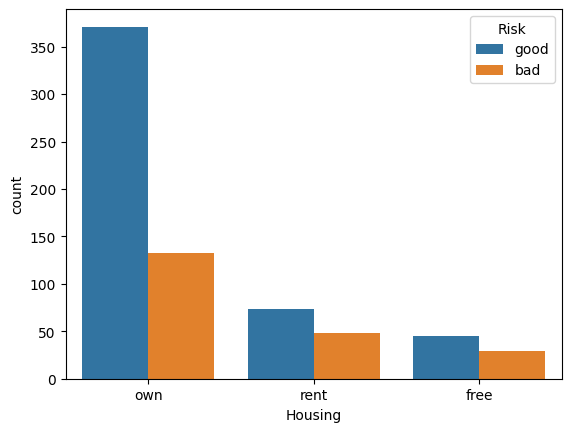

In [205]:
sns.countplot(data = data_train,
              x = 'Housing',
              hue = 'Risk')

In [206]:
# Create a function for binning the numerical predictor
def create_binning(data, predictor_label, num_of_bins):
    """
    Function for binning numerical predictor.

    Parameters
    ----------
    data : array like
      The name of dataset.

    predictor_label : object
      The label of predictor variable.

    num_of_bins : integer
      The number of bins.


    Return
    ------
    data : array like
      The name of transformed dataset.

    """
    # Create a new column containing the binned predictor
    data[predictor_label + "_bin"] = pd.qcut(data[predictor_label],
                                             q = num_of_bins)

    return data

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [208]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [209]:
# Define data with numerical predictors
num_columns = ['Age','Credit amount','Duration']

In [210]:
# Define data with categorical predictors
cat_columns = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']

In [211]:
import seaborn as sns

In [212]:
data[['Age','Credit amount','Duration']].corr(method = 'pearson')

,Age,Credit amount,Duration
Age,1.000000,0.032716,-0.036136
Credit amount,0.032716,1.000000,0.624984
Duration,-0.036136,0.624984,1.000000


In [213]:
for column in num_columns:
  data_train_binned = create_binning(data = data_train,
                                     predictor_label = column,
                                     num_of_bins = 4)

In [214]:
data_train_binned.T

,328,891,255,243,492,597,7,951,224,317,...,460,603,286,729,747,73,401,769,2,617
Age,31,46,27,27,27,36,35,24,30,48,...,37,28,26,36,37,41,28,63,49,37
Sex,male,male,male,female,female,male,male,male,male,female,...,male,female,male,male,female,female,male,male,male,male
Job,2,2,1,2,2,1,3,2,2,1,...,2,3,2,2,1,1,2,1,1,2
Housing,own,own,own,own,own,own,rent,own,own,own,...,own,own,own,own,own,own,own,own,own,rent
Saving accounts,little,little,NaN,little,moderate,little,little,little,little,NaN,...,little,little,little,rich,little,little,NaN,little,little,little
Checking account,rich,NaN,moderate,NaN,NaN,moderate,moderate,little,NaN,moderate,...,little,NaN,little,rich,little,moderate,moderate,NaN,NaN,little
Credit amount,4473,1829,7418,1185,1237,4241,6948,2145,4657,4351,...,3620,3349,4788,1275,1274,5954,1887,1655,2096,3676
Duration,36,15,60,12,6,24,36,36,15,24,...,36,36,48,24,12,42,18,12,12,6
Purpose,radio/TV,radio/TV,radio/TV,business,radio/TV,business,car,business,car,furniture/equipment,...,furniture/equipment,furniture/equipment,car,business,car,business,business,radio/TV,education,car
Risk,good,good,good,good,good,bad,good,bad,good,good,...,good,bad,good,good,bad,good,good,good,good,good


In [215]:
# Check for missing values
data_train_binned.isna().sum()

Age                    0
Sex                    0
Job                    0
Housing                0
Saving accounts      125
Checking account     274
Credit amount          0
Duration               0
Purpose                0
Risk                   0
Age_bin                0
Credit amount_bin      0
Duration_bin           0
dtype: int64

In [216]:
cat_columns = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']

In [217]:
# Define columns with missing values
missing_columns = ['Saving accounts','Checking account']

In [218]:
data[['Sex','Job','Housing','Saving accounts','Checking account','Purpose']] = data[['Sex','Job','Housing','Saving accounts','Checking account','Purpose']].astype('category')

In [219]:
for column in missing_columns:
    # Convert the column to 'category' data type if it's not already
    data_train_binned[column] = data_train_binned[column].astype('category')

    # Add category 'Missing' to replace the missing values
    data_train_binned[column] = data_train_binned[column].cat.add_categories('Missing')

    # Replace missing values with category 'Missing'
    data_train_binned[column].fillna(value='Missing', inplace=True)

In [220]:
# Sanity check
data_train_binned.isna().sum()

Age                  0
Sex                  0
Job                  0
Housing              0
Saving accounts      0
Checking account     0
Credit amount        0
Duration             0
Purpose              0
Risk                 0
Age_bin              0
Credit amount_bin    0
Duration_bin         0
dtype: int64

In [221]:
data_train_binned['Checking account'].value_counts()

Missing     274
little      201
moderate    179
rich         46
Name: Checking account, dtype: int64

In [222]:
# Define the initial empty list
crosstab_num = []

for column in num_columns:

  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column + "_bin"],
                         data_train_binned['Risk'],
                         margins = True)

  # Append to the list
  crosstab_num.append(crosstab)

In [223]:
# Define the initial empty list
crosstab_cat = []

for column in cat_columns:

  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column],
                         data_train_binned['Risk'],
                         margins = True)

  # Append to the list
  crosstab_cat.append(crosstab)

In [224]:
# Put all two in a crosstab_list
crosstab_list = crosstab_num + crosstab_cat

crosstab_list

[Risk            bad  good  All
 Age_bin                       
 (19.999, 27.0]   76   126  202
 (27.0, 33.0]     52   113  165
 (33.0, 41.25]    39   119  158
 (41.25, 75.0]    43   132  175
 All             210   490  700,
 Risk                bad  good  All
 Credit amount_bin                 
 (249.999, 1336.0]    56   119  175
 (1336.0, 2290.0]     38   137  175
 (2290.0, 3965.25]    40   135  175
 (3965.25, 18424.0]   76    99  175
 All                 210   490  700,
 Risk           bad  good  All
 Duration_bin                 
 (3.999, 12.0]   55   193  248
 (12.0, 18.0]    39    93  132
 (18.0, 24.0]    44   110  154
 (24.0, 72.0]    72    94  166
 All            210   490  700,
 Risk    bad  good  All
 Sex                   
 female   76   138  214
 male    134   352  486
 All     210   490  700,
 Risk  bad  good  All
 Job                 
 0       6     9   15
 1      40    93  133
 2     130   318  448
 3      34    70  104
 All   210   490  700,
 Risk     bad  good  All
 Ho

In [225]:
# Define the initial list for WOE
WOE_list = []

# Define the initial list for IV
IV_list = []

# Create the initial table for IV
IV_table = pd.DataFrame({'Characteristic': [],
                         'Information Value' : []})

# Perform the algorithm for all crosstab
for crosstab in crosstab_list:

  # Calculate % Good
  crosstab['p_good'] = crosstab['good']/crosstab['good']['All']

  # Calculate % Bad
  crosstab['p_bad'] = crosstab['bad']/crosstab['bad']['All']

  # Calculate the WOE
  crosstab['WOE'] = np.log(crosstab['p_good']/crosstab['p_bad'])

  # Calculate the contribution value for IV
  crosstab['contribution'] = (crosstab['p_good']-crosstab['p_bad'])*crosstab['WOE']

  # Calculate the IV
  IV = crosstab['contribution'][:-1].sum()

  add_IV = {'Characteristic': crosstab.index.name,
            'Information Value': IV}

  WOE_list.append(crosstab)
  IV_list.append(add_IV)

In [226]:
WOE_list

[Risk            bad  good  All    p_good     p_bad       WOE  contribution
 Age_bin                                                                   
 (19.999, 27.0]   76   126  202  0.257143  0.361905 -0.341749      0.035802
 (27.0, 33.0]     52   113  165  0.230612  0.247619 -0.071154      0.001210
 (33.0, 41.25]    39   119  158  0.242857  0.185714  0.268264      0.015329
 (41.25, 75.0]    43   132  175  0.269388  0.204762  0.274304      0.017727
 All             210   490  700  1.000000  1.000000  0.000000      0.000000,
 Risk                bad  good  All    p_good     p_bad       WOE  contribution
 Credit amount_bin                                                             
 (249.999, 1336.0]    56   119  175  0.242857  0.266667 -0.093526      0.002227
 (1336.0, 2290.0]     38   137  175  0.279592  0.180952  0.435097      0.042918
 (2290.0, 3965.25]    40   135  175  0.275510  0.190476  0.369097      0.031386
 (3965.25, 18424.0]   76    99  175  0.202041  0.361905 -0.582911  

In [227]:
# Create initial table to summarize the WOE values
WOE_table = pd.DataFrame({'Characteristic': [],
                          'Attribute': [],
                          'WOE': []})

for i in range(len(crosstab_list)):

  # Define crosstab and reset index
  crosstab = crosstab_list[i].reset_index()

  # Save the characteristic name
  char_name = crosstab.columns[0]

  # Only use two columns (Attribute name and its WOE value)
  # Drop the last row (average/total WOE)
  crosstab = crosstab.iloc[:-1, [0,-2]]
  crosstab.columns = ['Attribute', 'WOE']

  # Add the characteristic name in a column
  crosstab['Characteristic'] = char_name

  WOE_table = pd.concat((WOE_table, crosstab),
                        axis = 0)

  # Reorder the column
  WOE_table.columns = ['Characteristic',
                       'Attribute',
                       'WOE']

WOE_table

,Characteristic,Attribute,WOE
0,Age_bin,"(19.999, 27.0]",-0.341749
1,Age_bin,"(27.0, 33.0]",-0.071154
2,Age_bin,"(33.0, 41.25]",0.268264
3,Age_bin,"(41.25, 75.0]",0.274304
0,Credit amount_bin,"(249.999, 1336.0]",-0.093526
1,Credit amount_bin,"(1336.0, 2290.0]",0.435097
2,Credit amount_bin,"(2290.0, 3965.25]",0.369097
3,Credit amount_bin,"(3965.25, 18424.0]",-0.582911
0,Duration_bin,"(3.999, 12.0]",0.408059
1,Duration_bin,"(12.0, 18.0]",0.021740


In [228]:
# Put all IV in the table
IV_table = pd.DataFrame(IV_list)
IV_table

,Characteristic,Information Value
0,Age_bin,0.070069
1,Credit amount_bin,0.169717
2,Duration_bin,0.142667
3,Sex,0.029642
4,Job,0.008308
5,Housing,0.073117
6,Saving accounts,0.205745
7,Checking account,0.637278
8,Purpose,0.132252


In [229]:
# Define the predictive power of each characteristic
strength = []

# Assign the rule of thumb regarding IV
for iv in IV_table['Information Value']:
  if iv < 0.02:
    strength.append('Unpredictive')
  elif iv >= 0.02 and iv < 0.1:
    strength.append('Weak')
  elif iv >= 0.1 and iv < 0.3:
    strength.append('Medium')
  else:
    strength.append('Strong')

# Assign the strength to each characteristic
IV_table = IV_table.assign(Strength = strength)

# Sort the table by the IV values
IV_table.sort_values(by='Information Value', ascending=False)

,Characteristic,Information Value,Strength
7,Checking account,0.637278,Strong
6,Saving accounts,0.205745,Medium
1,Credit amount_bin,0.169717,Medium
2,Duration_bin,0.142667,Medium
8,Purpose,0.132252,Medium
5,Housing,0.073117,Weak
0,Age_bin,0.070069,Weak
3,Sex,0.029642,Weak
4,Job,0.008308,Unpredictive


In [230]:
# Create a funtion to plot the WOE
def plot_WOE(crosstab):
  """
  Function to plot the WOE trend.

  Parameters
  ----------
  crosstab : DataFrame
    The cross tabulation of the characteristic.

  """
  # Define the plot size
  plt.figure(figsize = (8,4))

  # Plot the WOE
  sns.pointplot(x = crosstab.T.columns,
                y = 'WOE',
                data = crosstab,
                markers = 'o',
                linestyles = '--',
                color = 'blue')

  # Rotate the label of x-axis
  plt.xticks(rotation = 20)

In [231]:
crosstab_list

[Risk            bad  good  All    p_good     p_bad       WOE  contribution
 Age_bin                                                                   
 (19.999, 27.0]   76   126  202  0.257143  0.361905 -0.341749      0.035802
 (27.0, 33.0]     52   113  165  0.230612  0.247619 -0.071154      0.001210
 (33.0, 41.25]    39   119  158  0.242857  0.185714  0.268264      0.015329
 (41.25, 75.0]    43   132  175  0.269388  0.204762  0.274304      0.017727
 All             210   490  700  1.000000  1.000000  0.000000      0.000000,
 Risk                bad  good  All    p_good     p_bad       WOE  contribution
 Credit amount_bin                                                             
 (249.999, 1336.0]    56   119  175  0.242857  0.266667 -0.093526      0.002227
 (1336.0, 2290.0]     38   137  175  0.279592  0.180952  0.435097      0.042918
 (2290.0, 3965.25]    40   135  175  0.275510  0.190476  0.369097      0.031386
 (3965.25, 18424.0]   76    99  175  0.202041  0.361905 -0.582911  

In [232]:
# Define the crosstab
crosstab_age_bin = crosstab_list[0]

crosstab_age_bin

Risk,bad,good,All,p_good,p_bad,WOE,contribution
Age_bin,,,,,,,
"(19.999, 27.0]",76,126,202,0.257143,0.361905,-0.341749,0.035802
"(27.0, 33.0]",52,113,165,0.230612,0.247619,-0.071154,0.001210
"(33.0, 41.25]",39,119,158,0.242857,0.185714,0.268264,0.015329
"(41.25, 75.0]",43,132,175,0.269388,0.204762,0.274304,0.017727
All,210,490,700,1.000000,1.000000,0.000000,0.000000


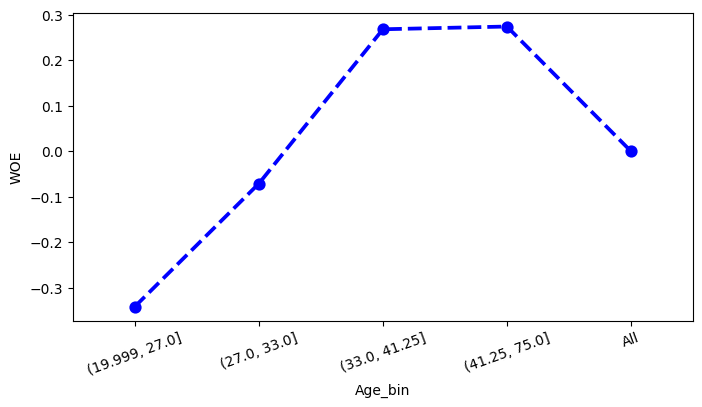

In [233]:
# Plot the WOE
plot_WOE(crosstab_age_bin)

In [40]:
# Define the crosstab
crosstab_credit_amount_bin = crosstab_list[1]

crosstab_credit_amount_bin

Risk,bad,good,All,p_good,p_bad,WOE,contribution
Credit amount_bin,,,,,,,
"(249.999, 1336.0]",56,119,175,0.242857,0.266667,-0.093526,0.002227
"(1336.0, 2290.0]",38,137,175,0.279592,0.180952,0.435097,0.042918
"(2290.0, 3965.25]",40,135,175,0.275510,0.190476,0.369097,0.031386
"(3965.25, 18424.0]",76,99,175,0.202041,0.361905,-0.582911,0.093187
All,210,490,700,1.000000,1.000000,0.000000,0.000000


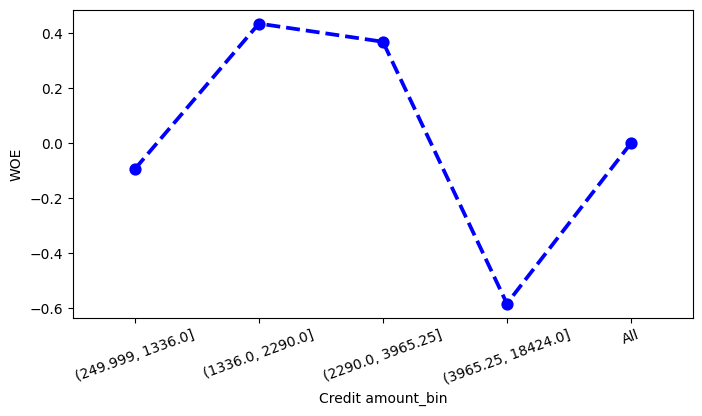

In [41]:
plot_WOE(crosstab_credit_amount_bin)

In [42]:
# Define the crosstab
crosstab_duration_bin = crosstab_list[2]

crosstab_duration_bin

Risk,bad,good,All,p_good,p_bad,WOE,contribution
Duration_bin,,,,,,,
"(3.999, 12.0]",55,193,248,0.393878,0.261905,0.408059,0.053853
"(12.0, 18.0]",39,93,132,0.189796,0.185714,0.021740,0.000089
"(18.0, 24.0]",44,110,154,0.224490,0.209524,0.068993,0.001033
"(24.0, 72.0]",72,94,166,0.191837,0.342857,-0.580669,0.087693
All,210,490,700,1.000000,1.000000,0.000000,0.000000


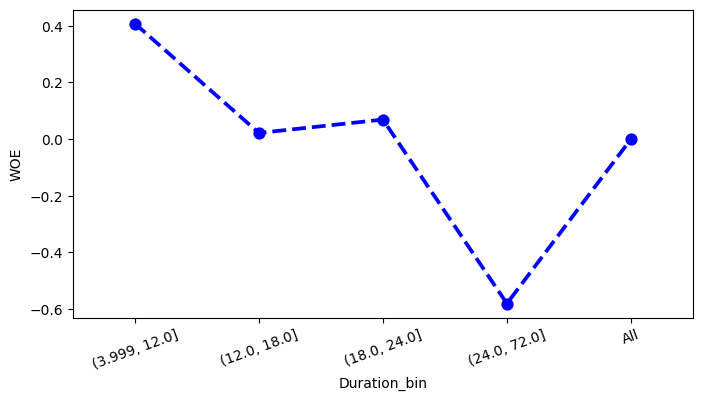

In [43]:
plot_WOE(crosstab_duration_bin)

In [47]:
crosstab_sex = crosstab_list[3]

crosstab_sex

Risk,bad,good,All,p_good,p_bad,WOE,contribution
Sex,,,,,,,
female,76,138,214,0.281633,0.361905,-0.250778,0.020130
male,134,352,486,0.718367,0.638095,0.118494,0.009512
All,210,490,700,1.000000,1.000000,0.000000,0.000000


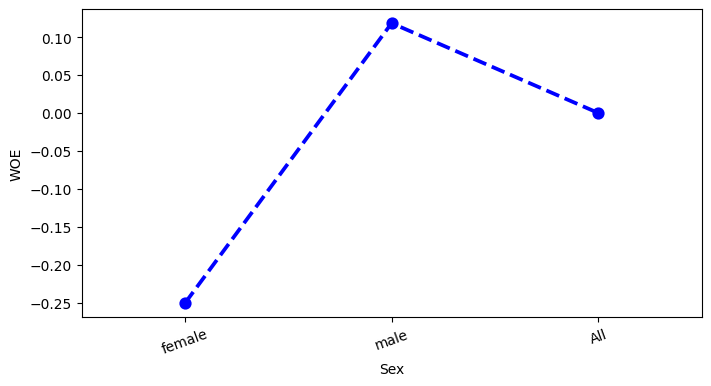

In [48]:
plot_WOE(crosstab_sex)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

In [49]:
crosstab_job = crosstab_list[4]

crosstab_job

Risk,bad,good,All,p_good,p_bad,WOE,contribution
Job,,,,,,,
0,6,9,15,0.018367,0.028571,-0.441833,0.004508
1,40,93,133,0.189796,0.190476,-0.003578,0.000002
2,130,318,448,0.648980,0.619048,0.047219,0.001413
3,34,70,104,0.142857,0.161905,-0.125163,0.002384
All,210,490,700,1.000000,1.000000,0.000000,0.000000


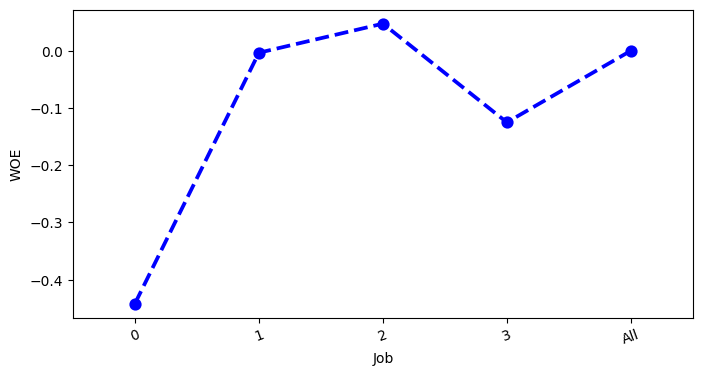

In [50]:
plot_WOE(crosstab_job)

In [51]:
crosstab_housing= crosstab_list[5]

crosstab_housing

Risk,bad,good,All,p_good,p_bad,WOE,contribution
Housing,,,,,,,
free,29,45,74,0.091837,0.138095,-0.407931,0.018870
own,133,371,504,0.757143,0.633333,0.178555,0.022107
rent,48,74,122,0.151020,0.228571,-0.414434,0.032140
All,210,490,700,1.000000,1.000000,0.000000,0.000000


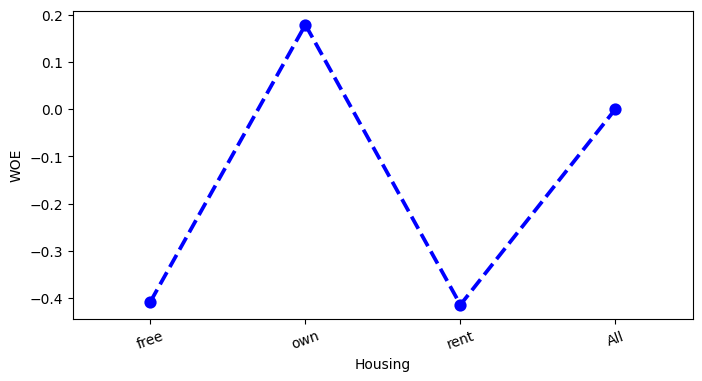

In [52]:
plot_WOE(crosstab_housing)

In [55]:
crosstab_saving_accounts= crosstab_list[6]

crosstab_saving_accounts

Risk,bad,good,All,p_good,p_bad,WOE,contribution
Saving accounts,,,,,,,
little,153,275,428,0.561224,0.728571,-0.260965,0.043672
moderate,25,53,78,0.108163,0.119048,-0.095882,0.001044
quite rich,5,31,36,0.063265,0.023810,0.977251,0.038558
rich,3,30,33,0.061224,0.014286,1.455287,0.068309
Missing,24,101,125,0.206122,0.114286,0.589769,0.054162
All,210,490,700,1.000000,1.000000,0.000000,0.000000


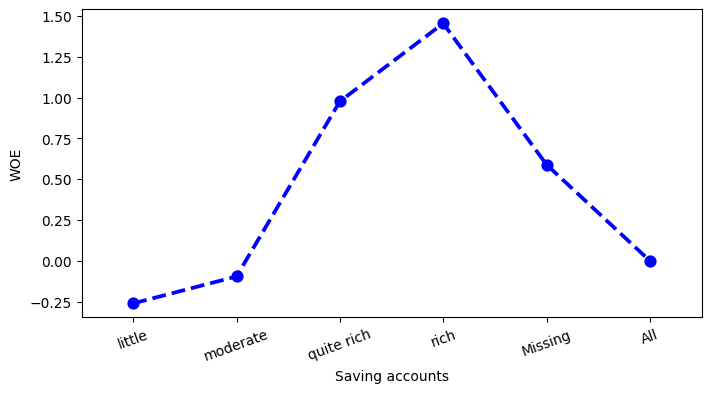

In [56]:
plot_WOE(crosstab_saving_accounts)

In [59]:
crosstab_checking_account= crosstab_list[7]

crosstab_checking_account

Risk,bad,good,All,p_good,p_bad,WOE,contribution
Checking account,,,,,,,
little,98,103,201,0.210204,0.466667,-0.797536,0.204538
moderate,69,110,179,0.224490,0.328571,-0.380924,0.039647
rich,10,36,46,0.073469,0.047619,0.433636,0.011210
Missing,33,241,274,0.491837,0.157143,1.140992,0.381883
All,210,490,700,1.000000,1.000000,0.000000,0.000000


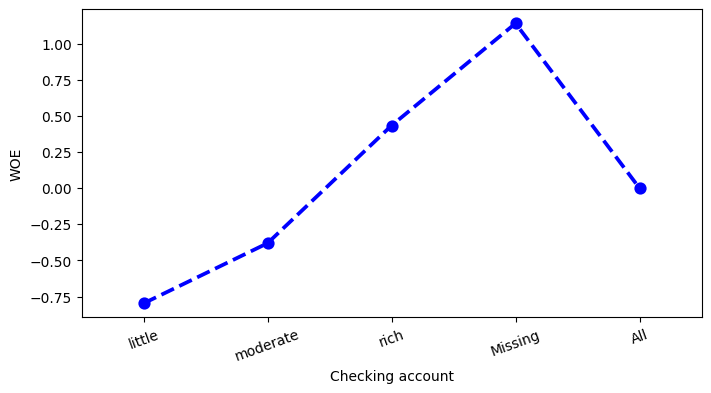

In [60]:
plot_WOE(crosstab_checking_account)

In [62]:
crosstab_purpose= crosstab_list[8]

crosstab_purpose

Risk,bad,good,All,p_good,p_bad,WOE,contribution
Purpose,,,,,,,
business,25,42,67,0.085714,0.119048,-0.328504,0.010950
car,72,158,230,0.322449,0.342857,-0.061369,0.001252
domestic appliances,2,5,7,0.010204,0.009524,0.068993,0.000047
education,17,22,39,0.044898,0.080952,-0.589469,0.021253
furniture/equipment,45,92,137,0.187755,0.214286,-0.132172,0.003507
radio/TV,38,157,195,0.320408,0.180952,0.571362,0.079680
repairs,7,10,17,0.020408,0.033333,-0.490623,0.006341
vacation/others,4,4,8,0.008163,0.019048,-0.847298,0.009222
All,210,490,700,1.000000,1.000000,0.000000,0.000000


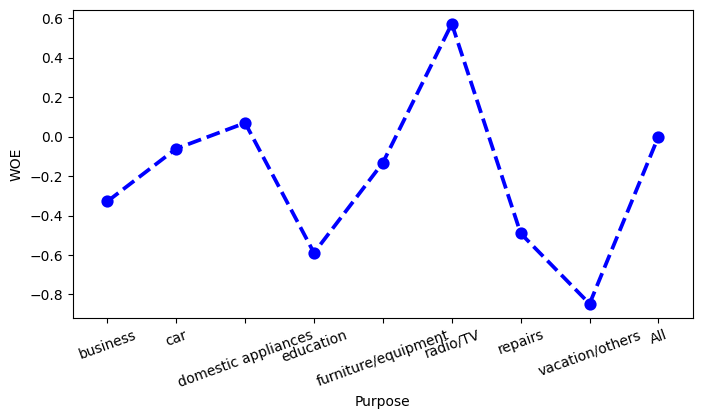

In [63]:
plot_WOE(crosstab_purpose)

In [234]:
# Function to generate the WOE mapping dictionary
def get_woe_map_dict(WOE_table):

    # Initialize the dictionary
    WOE_map_dict = {}
    WOE_map_dict['Missing'] = {}

    unique_char = set(WOE_table['Characteristic'])
    for char in unique_char:
        # Get the Attribute & WOE info for each characteristics
        current_data = (WOE_table
                            [WOE_table['Characteristic']==char]     # Filter based on characteristic
                            [['Attribute', 'WOE']])                 # Then select the attribute & WOE

        # Get the mapping
        WOE_map_dict[char] = {}
        for idx in current_data.index:
            attribute = current_data.loc[idx, 'Attribute']
            woe = current_data.loc[idx, 'WOE']

            if attribute == 'Missing':
                WOE_map_dict['Missing'][char] = woe
            else:
                WOE_map_dict[char][attribute] = woe
                WOE_map_dict['Missing'][char] = np.nan

    # Validate data
    print('Number of key : ', len(WOE_map_dict.keys()))

    return WOE_map_dict


In [235]:
# Function to replace the raw data in the train set with WOE values
def transform_woe(raw_data, WOE_dict, num_cols):

    woe_data = raw_data.copy()

    # Map the raw data
    for col in woe_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        woe_data[col] = woe_data[col].map(WOE_map_dict[map_col])

    # Map the raw data if there is a missing value or out of range value
    for col in woe_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        woe_data[col] = woe_data[col].fillna(value=WOE_map_dict['Missing'][map_col])

    return woe_data

In [236]:
# Generate the WOE map dictionary
WOE_map_dict = get_woe_map_dict(WOE_table = WOE_table)
WOE_map_dict

Number of key :  10


{'Missing': {'Saving accounts': 0.5897688261061103,
  'Housing': nan,
  'Job': nan,
  'Credit amount_bin': nan,
  'Checking account': 1.1409915116369713,
  'Age_bin': nan,
  'Duration_bin': nan,
  'Purpose': nan,
  'Sex': nan},
 'Saving accounts': {'little': -0.2609646841130679,
  'moderate': -0.0958817717032824,
  'quite rich': 0.9772514316638422,
  'rich': 1.455287232606842},
 'Housing': {'free': -0.4079312006033579,
  'own': 0.17855507399847784,
  'rent': -0.41443377809092463},
 'Job': {0: -0.4418327522790392,
  1: -0.0035778213478839666,
  2: 0.04721907193739085,
  3: -0.12516314295400616},
 'Credit amount_bin': {Interval(249.999, 1336.0, closed='right'): -0.09352605801082348,
  Interval(1336.0, 2290.0, closed='right'): 0.4350969057145356,
  Interval(2290.0, 3965.25, closed='right'): 0.3690974639372895,
  Interval(3965.25, 18424.0, closed='right'): -0.5829113505389447},
 'Checking account': {'little': -0.7975363508281398,
  'moderate': -0.38092399919204684,
  'rich': 0.433635985074

In [237]:
# Transform the X_train
woe_train = transform_woe(raw_data = X_train,
                          WOE_dict = WOE_map_dict,
                          num_cols = num_columns)

woe_train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
328,-0.071154,0.118494,0.047219,0.178555,-0.260965,0.433636,-0.582911,-0.580669,0.571362
891,0.274304,0.118494,0.047219,0.178555,-0.260965,1.140992,0.435097,0.021740,0.571362
255,-0.341749,0.118494,-0.003578,0.178555,0.589769,-0.380924,-0.582911,-0.580669,0.571362
243,-0.341749,-0.250778,0.047219,0.178555,-0.260965,1.140992,-0.093526,0.408059,-0.328504
492,-0.341749,-0.250778,0.047219,0.178555,-0.095882,1.140992,-0.093526,0.408059,0.571362
...,...,...,...,...,...,...,...,...,...
73,0.268264,-0.250778,-0.003578,0.178555,-0.260965,-0.380924,-0.582911,-0.580669,-0.328504
401,-0.071154,0.118494,0.047219,0.178555,0.589769,-0.380924,0.435097,0.021740,-0.328504
769,0.274304,0.118494,-0.003578,0.178555,-0.260965,1.140992,0.435097,0.408059,0.571362
2,0.274304,0.118494,-0.003578,0.178555,-0.260965,1.140992,0.435097,0.408059,-0.589469


In [238]:
# Transform the X_test
woe_test = transform_woe(raw_data = X_test,
                         WOE_dict = WOE_map_dict,
                         num_cols = num_columns)

woe_test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
80,0.274304,-0.250778,0.047219,0.178555,0.589769,1.140992,-0.582911,0.068993,0.571362
157,0.274304,0.118494,-0.003578,0.178555,-0.260965,-0.797536,-0.093526,0.408059,-0.589469
65,0.274304,0.118494,0.047219,0.178555,0.589769,1.140992,-0.582911,-0.580669,-0.490623
489,-0.341749,0.118494,0.047219,-0.414434,-0.260965,1.140992,0.369097,0.408059,-0.061369
804,-0.341749,-0.250778,-0.441833,-0.414434,0.589769,-0.380924,-0.582911,0.408059,-0.061369
...,...,...,...,...,...,...,...,...,...
19,-0.071154,0.118494,0.047219,0.178555,0.977251,1.140992,0.369097,0.068993,0.571362
208,-0.341749,0.118494,-0.003578,0.178555,-0.260965,-0.797536,-0.582911,0.068993,-0.328504
627,-0.071154,0.118494,0.047219,0.178555,-0.095882,-0.380924,0.435097,0.408059,-0.061369
357,-0.341749,0.118494,-0.125163,0.178555,-0.260965,1.140992,-0.582911,-0.580669,0.571362


In [239]:
# Rename the raw X_train for the future
raw_train = X_train
raw_train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
328,31,male,2,own,little,rich,4473,36,radio/TV
891,46,male,2,own,little,NaN,1829,15,radio/TV
255,27,male,1,own,NaN,moderate,7418,60,radio/TV
243,27,female,2,own,little,NaN,1185,12,business
492,27,female,2,own,moderate,NaN,1237,6,radio/TV
...,...,...,...,...,...,...,...,...,...
73,41,female,1,own,little,moderate,5954,42,business
401,28,male,2,own,NaN,moderate,1887,18,business
769,63,male,1,own,little,NaN,1655,12,radio/TV
2,49,male,1,own,little,NaN,2096,12,education


In [241]:
raw_test=X_test
raw_test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
80,44,female,2,own,NaN,NaN,5943,24,radio/TV
157,45,male,1,own,little,little,339,12,education
65,48,male,2,own,NaN,NaN,5190,27,repairs
489,26,male,2,rent,little,NaN,3518,6,car
804,24,female,0,rent,NaN,moderate,7472,12,car
...,...,...,...,...,...,...,...,...,...
19,31,male,2,own,quite rich,NaN,3430,24,radio/TV
208,21,male,1,own,little,little,6568,24,business
627,29,male,2,own,moderate,moderate,1437,9,car
357,26,male,3,own,little,NaN,4463,36,radio/TV


In [242]:
# Define X_train
X_train = woe_train.to_numpy()
X_train

array([[-0.07115376,  0.11849352,  0.04721907, ..., -0.58291135,
        -0.5806692 ,  0.57136179],
       [ 0.27430395,  0.11849352,  0.04721907, ...,  0.43509691,
         0.02173999,  0.57136179],
       [-0.34174929,  0.11849352, -0.00357782, ..., -0.58291135,
        -0.5806692 ,  0.57136179],
       ...,
       [ 0.27430395,  0.11849352, -0.00357782, ...,  0.43509691,
         0.40805914,  0.57136179],
       [ 0.27430395,  0.11849352, -0.00357782, ...,  0.43509691,
         0.40805914, -0.58946875],
       [ 0.26826399,  0.11849352,  0.04721907, ...,  0.36909746,
         0.40805914, -0.06136895]])

In [243]:
# Define X_train
X_test = woe_test.to_numpy()
X_test

array([[ 0.27430395, -0.25077752,  0.04721907, ..., -0.58291135,
         0.06899287,  0.57136179],
       [ 0.27430395,  0.11849352, -0.00357782, ..., -0.09352606,
         0.40805914, -0.58946875],
       [ 0.27430395,  0.11849352,  0.04721907, ..., -0.58291135,
        -0.5806692 , -0.49062292],
       ...,
       [-0.07115376,  0.11849352,  0.04721907, ...,  0.43509691,
         0.40805914, -0.06136895],
       [-0.34174929,  0.11849352, -0.12516314, ..., -0.58291135,
        -0.5806692 ,  0.57136179],
       [-0.34174929,  0.11849352, -0.00357782, ..., -0.09352606,
         0.40805914, -0.49062292]])

In [184]:
# Check y_train
y_train = y_train.to_numpy()
y_train

array(['good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good',

In [244]:
y_train[y_train == 'bad'] = 1
y_train[y_train == 'good'] = 0

In [245]:
y_train = y_train.astype('i')
y_train = np.int64(y_train)
y_train

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [246]:
y_test[y_test == 'bad'] = 1
y_test[y_test == 'good'] = 0

In [247]:
y_test = y_test.astype('i')
y_test = np.int64(y_test)
y_test

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [249]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)



LogisticRegression()

In [251]:
# Step 3: Make predictions on the test set
y_pred = logreg_model.predict(X_train)

In [252]:
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7471


In [253]:
# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[441  49]
 [128  82]]


In [254]:
# Classification report
classification_rep = classification_report(y_train, y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       490
           1       0.63      0.39      0.48       210

    accuracy                           0.75       700
   macro avg       0.70      0.65      0.66       700
weighted avg       0.73      0.75      0.73       700



In [255]:
# ROC AUC score (if applicable for binary classification)
roc_auc = roc_auc_score(y_train, y_pred)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.6452


In [256]:
null_indices = np.isnan(X_test)

In [257]:
print("Indices of null values:", np.where(null_indices)[0])

Indices of null values: [210 230]
